In [45]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 80
plt.rcParams.update({'font.size': 18})
# figsize=(15, 10), dpi=80

theta = np.array([np.pi/15, -np.pi/6, -np.pi/10])
Sigma = np.diag([4, 1, 0.3]) # scale x, then y, then z; TODO - play around with these values :)

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma


In [46]:
def plot_both():

  # Plot sphere
  fig = plt.figure()
  ax1 = fig.add_subplot(121, projection='3d', title='ORIGINAL')
  u = np.linspace(-np.pi, np.pi, 100)  # spinning in the x-y plane
  v = np.linspace(0, np.pi, 100)       # vertical direction, top to bottom, i.e. z-axis
  x = np.outer(np.cos(u), np.sin(v))
  y = np.outer(np.sin(u), np.sin(v))
  z = np.outer(np.ones(np.size(u)), np.cos(v))

  # print('u meta  ', u.shape, u.dtype)
  # print('v meta  ', v.shape, v.dtype)
  # print('x meta  ', x.shape, x.dtype)
  # print('y meta  ', y.shape, y.dtype)
  # print('z meta  ', z.shape, z.dtype)
  # print(z[0, :])

  # Plot the surface
  surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
  surf1.set_edgecolor('k')
  ax1.set_xlim3d(-2, 2)
  ax1.set_ylim3d(-2, 2)
  ax1.set_zlim3d(-2, 2)

  xR = np.zeros_like(x)
  yR = np.zeros_like(y)
  zR = np.zeros_like(z)

  for i in range(x.shape[0]):
      for j in range(x.shape[1]):
          vec = [x[i,j], y[i,j], z[i,j]]
          vecR = X @ vec
          xR[i,j] = vecR[0]
          yR[i,j] = vecR[1]
          zR[i,j] = vecR[2]
          
  ax2 = fig.add_subplot(122, projection='3d', title='TRANSFORMED')
  surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
  surf2.set_edgecolor('k')
  ax2.set_xlim3d(-2, 2)
  ax2.set_ylim3d(-2, 2)
  ax2.set_zlim3d(-2, 2)
  plt.show()

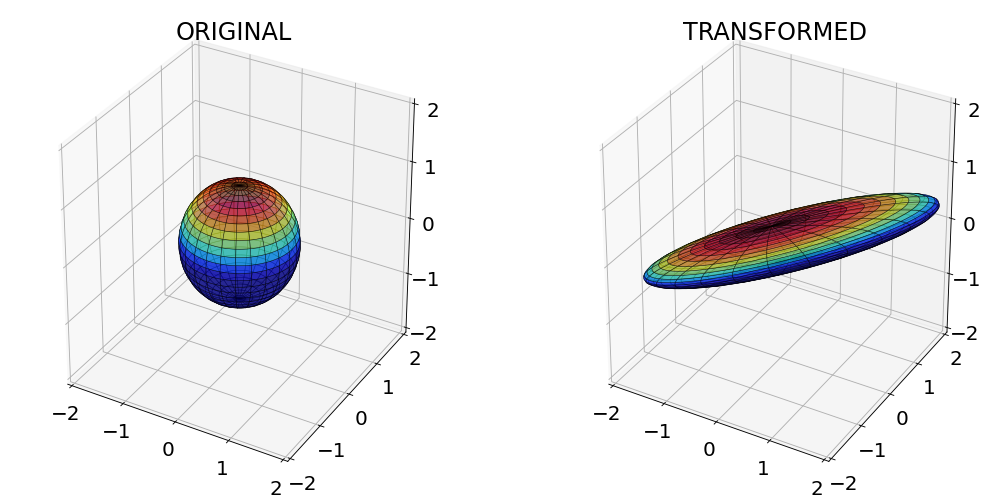

In [47]:
# Plot premeditated transformation
plot_both()

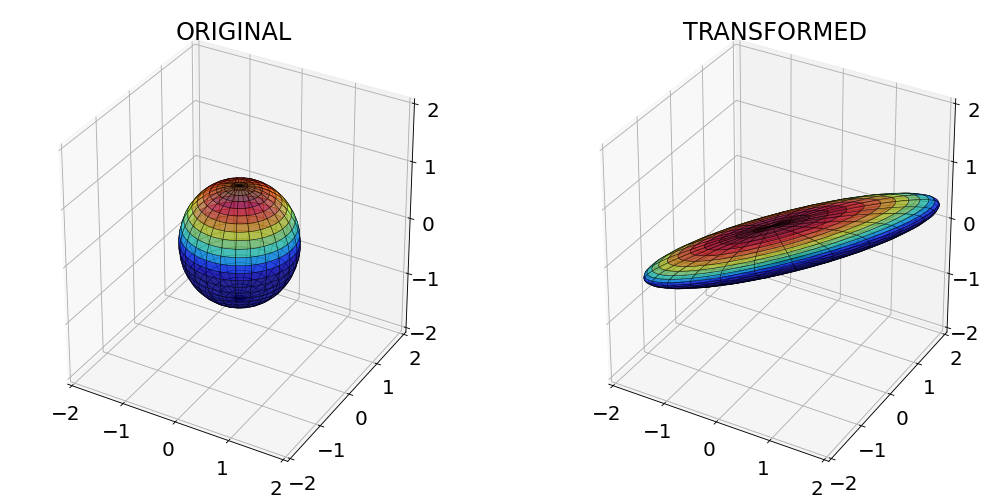

In [48]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

# S is a 1-D array
# print(S.shape)

X = U @ np.diag(S)
# X = U @ np.diag(S) @ VT

# Plot transformation reconstructed by SVD
plot_both()